In [1]:
import os
import io
import pandas as pd
import glob
import pyodbc
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# clarify
path = r"\\VNCRP1002\ud03$\X266754\My Documents\Complaints\data\clarify"
# read all the files with extension .csv
filenames = glob.glob(path + "\*.csv")
print(filenames)

['\\\\VNCRP1002\\ud03$\\X266754\\My Documents\\Complaints\\data\\clarify\\clarify_report_sr_notes_Apr2022_OLTP.csv', '\\\\VNCRP1002\\ud03$\\X266754\\My Documents\\Complaints\\data\\clarify\\clarify_report_sr_notes_Jun2022_OLTP.csv', '\\\\VNCRP1002\\ud03$\\X266754\\My Documents\\Complaints\\data\\clarify\\clarify_report_sr_notes_Mar2022_OLTP.csv', '\\\\VNCRP1002\\ud03$\\X266754\\My Documents\\Complaints\\data\\clarify\\clarify_report_sr_notes_May2022_OLTP.csv']


In [3]:
#list of all df
dfs = []
for f in filenames: 
    print(f)
    d = pd.read_csv(f, encoding="ISO-8859-1", header=None, skiprows=1, na_values=" ") 
    dfs.append(d) 
df_clarify = pd.concat(dfs, ignore_index=True)

\\VNCRP1002\ud03$\X266754\My Documents\Complaints\data\clarify\clarify_report_sr_notes_Apr2022_OLTP.csv
\\VNCRP1002\ud03$\X266754\My Documents\Complaints\data\clarify\clarify_report_sr_notes_Jun2022_OLTP.csv
\\VNCRP1002\ud03$\X266754\My Documents\Complaints\data\clarify\clarify_report_sr_notes_Mar2022_OLTP.csv
\\VNCRP1002\ud03$\X266754\My Documents\Complaints\data\clarify\clarify_report_sr_notes_May2022_OLTP.csv


In [5]:
df_clarify.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,38742044,VHZ3ZJ3F,Paperwork,2005-06-03-11.17.20.000000,418288827,VHZ3ZJ3F-3,050600136-00 - Complaint Processing - 38742044,Customer Complaint ...,Complaint Processing ...,Additional Handling,2005-06-03-14.14.26.000000,2005-06-22-18.10.55.000000,NaN,NaN
1,47498880,VJZ7Z92W,Paperwork,2005-07-07-09.39.06.000000,97226500,VJZ7Z92W-1,050700216-00 - Complaint Processing - 47498880,Customer Complaint ...,Complaint Processing ...,Additional Handling,2005-07-07-09.39.06.000000,2005-07-20-15.54.12.000000,NaN,NaN
2,11617077,VJ133FHN,Paperwork,2005-07-13-16.34.48.000000,995809760,VJ133FHN-1,050700523-00 - Complaint Processing - 11617077,Customer Complaint ...,Complaint Processing ...,Additional Handling,2005-07-13-16.34.49.000000,2005-07-20-18.05.43.000000,NaN,NaN
3,E1754625,AGPU324G,Continue,2016-10-28-14.27.46.000000,305980847,AGPU324G-K002,161000705 - 01 - Complaint Processing - E1754625,Customer Complaint ...,Complaint Processing ...,Additional Handling,2017-11-15-15.29.22.000000,2022-04-26-13.10.23.000000,NaN,NaN
4,96097971,AJBB37NY,Continue,2018-01-11-15.10.55.000000,427138735,AJBB37NY-K000,180181564 - 00 - Complaint Processing - 96097971,Customer Complaint ...,Complaint Processing ...,Additional Handling,2018-01-11-15.10.55.000000,2018-03-12-13.02.02.000000,NaN,NaN


In [7]:
df_clarify.columns =[
'POLICY_NBR',
'CASE_ID',
'CASE_TITLE',
'CASE_CREATE_DATE',
'CLIENT_ID',
'SR_ID',
'SR_TITLE',
'SR_TYPE_CATG',
'SR_TYPE_DESC',
'SUB_TYPE',
'SR_CREATE_DT',
'SR_CLOSE_DT',
'ACTION_TYPE',
'SR_NOTES'
]

In [9]:
df_clarify[df_clarify['POLICY_NBR']=='E1754625']

,POLICY_NBR,CASE_ID,CASE_TITLE,CASE_CREATE_DATE,CLIENT_ID,SR_ID,SR_TITLE,SR_TYPE_CATG,SR_TYPE_DESC,SUB_TYPE,SR_CREATE_DT,SR_CLOSE_DT,ACTION_TYPE,SR_NOTES
3,E1754625,AGPU324G,Continue,2016-10-28-14.27.46.000000,305980847,AGPU324G-K002,161000705 - 01 - Complaint Processing - E1754625,Customer Complaint ...,Complaint Processing ...,Additional Handling,2017-11-15-15.29.22.000000,2022-04-26-13.10.23.000000,NaN,NaN


### Processing

In [27]:
# remove whitespaces
for col in df_clarify.columns:
    try:
        df_clarify[col] = df_clarify[col].str.strip()
    except AttributeError:
        pass

In [28]:
df_clarify= df_clarify.sort_values(['POLICY_NBR','SR_CREATE_DT'])

In [29]:
df_clarify["SR_TYPE_CATG"]= df_clarify["SR_TYPE_CATG"].str.replace(" ","")
df_clarify["SR_TYPE_DESC"]= df_clarify["SR_TYPE_DESC"].str.replace(" ","")

In [30]:
df_clarify = df_clarify[['POLICY_NBR', 'CASE_CREATE_DATE', 'SR_CREATE_DT', 'SR_CLOSE_DT','SR_TYPE_CATG']]

In [31]:
df_clarify = df_clarify.drop_duplicates(keep='last')
df_clarify.shape

(2742957, 5)

In [32]:
df_clarify['CASE_CREATE_DATE']= pd.to_datetime(df_clarify['CASE_CREATE_DATE'], format="%Y-%m-%d-%H.%M.%S.%f").dt.strftime('%m/%d/%y')
df_clarify['CASE_CREATE_DATE']=pd.to_datetime(df_clarify['CASE_CREATE_DATE'])

df_clarify['SR_CREATE_DT']= pd.to_datetime(df_clarify['SR_CREATE_DT'], format="%Y-%m-%d-%H.%M.%S.%f").dt.strftime('%m/%d/%y')
df_clarify['SR_CREATE_DT']=pd.to_datetime(df_clarify['SR_CREATE_DT'])

df_clarify['SR_CLOSE_DT']= pd.to_datetime(df_clarify['SR_CLOSE_DT'], format="%Y-%m-%d-%H.%M.%S.%f").dt.strftime('%m/%d/%y')
df_clarify['SR_CLOSE_DT']=pd.to_datetime(df_clarify['SR_CLOSE_DT'])

In [ ]:
# most frequently appearing category within the same month

In [11]:
#df_clarify = df_clarify[df_clarify['SR_CREATE_DT']>='2022-03-01']

In [34]:
pd.set_option('display.max_colwidth', 400)
df_clarify[df_clarify['POLICY_NBR']=='R5025627']

,POLICY_NBR,CASE_CREATE_DATE,SR_CREATE_DT,SR_CLOSE_DT,SR_TYPE_CATG,sr_create_month
2756955,R5025627,2022-03-01,2022-03-01,2022-03-01,Corres,2022-03
3133084,R5025627,2022-03-08,2022-03-08,2022-03-29,Disbursements,2022-03
3203701,R5025627,2022-03-08,2022-03-08,2022-03-08,Disbursements,2022-03
2350644,R5025627,2022-03-08,2022-03-08,2022-03-09,ClientChg,2022-03
3293419,R5025627,2022-03-26,2022-03-26,2022-03-30,EFT,2022-03
769860,R5025627,2022-04-01,2022-04-01,2022-04-03,Quotes,2022-04
58066,R5025627,2022-04-01,2022-04-01,2022-04-02,Quotes,2022-04


### Processing

In [56]:
min_create_dt= pd.DataFrame(df_clarify.groupby(['POLICY_NBR','SR_TYPE_CATG'])['SR_CREATE_DT'].min()).reset_index()
max_close_dt= pd.DataFrame(df_clarify.groupby(['POLICY_NBR','SR_TYPE_CATG'])['SR_CLOSE_DT'].max()).reset_index()
min_max_df = min_create_dt.merge(max_close_dt, how= 'inner', on =['POLICY_NBR','SR_TYPE_CATG'])
min_max_df['sr_create_month'] = min_max_df['SR_CREATE_DT'].dt.to_period('M')

min_max_df['closed'] = np.where(min_max_df['SR_CLOSE_DT'].isnull() , 0, 1)
min_max_df['time_to_close']= np.round((min_max_df['SR_CLOSE_DT'] - min_max_df['SR_CREATE_DT'])/np.timedelta64(1, 'D'), 0)

#min_create_dt['min_create_dt'] = min_create_dt['SR_CREATE_DT']

In [57]:
min_max_df[min_max_df['POLICY_NBR']=='R5025627']

,POLICY_NBR,SR_TYPE_CATG,SR_CREATE_DT,SR_CLOSE_DT
1265629,R5025627,ClientChg,2022-03-08,2022-03-09
1265630,R5025627,Corres,2022-03-01,2022-03-01
1265631,R5025627,Disbursements,2022-03-08,2022-03-29
1265632,R5025627,EFT,2022-03-26,2022-03-30
1265633,R5025627,Quotes,2022-04-01,2022-04-03


In [58]:
# min_max_df['sr_create_month'] = min_max_df['SR_CREATE_DT'].dt.to_period('M')

In [83]:
min_max_df['closed'] = np.where(min_max_df['SR_CLOSE_DT'].isnull() , 0, 1)
min_max_df['time_to_close']= np.round((min_max_df['SR_CLOSE_DT'] - min_max_df['SR_CREATE_DT'])/np.timedelta64(1, 'D'), 0)

In [84]:
min_max_df[min_max_df['POLICY_NBR']=='R5025627'].head()

,POLICY_NBR,SR_TYPE_CATG,SR_CREATE_DT,SR_CLOSE_DT,sr_create_month,closed,time_to_close
1265629,R5025627,ClientChg,2022-03-08,2022-03-09,2022-03,1,1.0
1265630,R5025627,Corres,2022-03-01,2022-03-01,2022-03,1,0.0
1265631,R5025627,Disbursements,2022-03-08,2022-03-29,2022-03,1,21.0
1265632,R5025627,EFT,2022-03-26,2022-03-30,2022-03,1,4.0
1265633,R5025627,Quotes,2022-04-01,2022-04-03,2022-04,1,2.0


In [87]:
# count number of cases per month
df_count = pd.DataFrame(min_max_df.groupby(['POLICY_NBR','sr_create_month'])['SR_TYPE_CATG'].count()).reset_index()
df_count.columns = ['POLICY_NBR', 'sr_create_month', 'num_sr_catg']
#min_max_df = min_max_df.merge(df_mult,  on ='POLICY_NBR', how = 'left')
#df = df.dropna(subset=['complaint_date'])

In [90]:
df_count[df_count['POLICY_NBR']=='R5025627'].head()

,POLICY_NBR,sr_create_month,num_sr_catg
917568,R5025627,2022-03,4
917569,R5025627,2022-04,1


In [88]:
# service category that took the longest in each month
df_sr_time = pd.DataFrame(min_max_df.groupby(['POLICY_NBR','sr_create_month'])['time_to_close'].max()).reset_index()
df_sr_time.columns = ['POLICY_NBR', 'sr_create_month', 'max_sr_time']
#min_max_df = min_max_df.merge(df_mult,  on ='POLICY_NBR', how = 'left')
#df = df.dropna(subset=['complaint_date'])

In [89]:
df_sr_time[df_sr_time['POLICY_NBR']=='R5025627'].head()

,POLICY_NBR,sr_create_month,max_sr_time
917568,R5025627,2022-03,21.0
917569,R5025627,2022-04,2.0


In [98]:
df = df_count.merge(df_sr_time, how= 'inner', on =['POLICY_NBR','sr_create_month'])

In [99]:
df = df.merge(min_max_df, how= 'inner', 
                      left_on =['POLICY_NBR','sr_create_month','max_sr_time'],
                      right_on =['POLICY_NBR','sr_create_month','time_to_close']
                     )

In [100]:
df = df[['POLICY_NBR', 'sr_create_month', 'SR_TYPE_CATG', 'num_sr_catg', 'max_sr_time', 'closed']]
df[df['POLICY_NBR']=='R5025627'].head()

,POLICY_NBR,sr_create_month,SR_TYPE_CATG,num_sr_catg,max_sr_time,closed
958634,R5025627,2022-03,Disbursements,4,21.0,1
958635,R5025627,2022-04,Quotes,1,2.0,1


In [110]:
### parquet file
df.to_parquet('clarify_mar_june.parquet')

## EDA

In [102]:
def summary_table(data, text):
    total= pd.DataFrame(df.groupby('sr_create_month')['POLICY_NBR'].count())
    d_open =data[data['closed']==0]
    d_closed =data[data['closed']==1]
    sub_open= pd.DataFrame(d_open.groupby('sr_create_month')['POLICY_NBR'].count())
    sub_closed= pd.DataFrame(d_closed.groupby('sr_create_month')['POLICY_NBR'].count())
    sub_total = sub_open + sub_closed
    case_per = pd.DataFrame(((sub_total/total)*100).round(2))
    closed_per = pd.DataFrame(((sub_closed/total)*100).round(2))
    time_pending= pd.DataFrame(d_open.groupby('sr_create_month')['max_sr_time'].mean().round(2))
    time_closed= pd.DataFrame(d_closed.groupby('sr_create_month')['max_sr_time'].mean().round(2))
    table =pd.concat([total,sub_total, sub_open, sub_closed, case_per, time_closed], axis=1).reindex()
    table.columns = ['Total Notes', text, 'Open Cases', 'Closed Cases', 'Percent of Total', 'Time to Close']
    table.loc['total']= table.sum()
    table = table.reset_index()
    table.at[7, 'Percent of Total'] = (table.at[7,text]/(table.at[7,'Total Notes'])*100).round(2)
    table.at[7, 'Time to Close'] = table['Time to Close'].iloc[0:7].mean()
    table['Time to Close'] =table['Time to Close'].round(2)
    return table

In [107]:
def summary_table2(data, g):
    total= pd.DataFrame(df.groupby(g)['POLICY_NBR'].count())
    d_open =data[data['closed']==0]
    d_closed =data[data['closed']==1]
    sub_open= pd.DataFrame(d_open.groupby(g)['POLICY_NBR'].count())
    sub_closed= pd.DataFrame(d_closed.groupby(g)['POLICY_NBR'].count())
    sub_total = sub_open + sub_closed
    case_per = pd.DataFrame(((sub_total/total)*100).round(2))
    closed_per = pd.DataFrame(((sub_closed/total)*100).round(2))
    time_pending= pd.DataFrame(d_open.groupby(g)['max_sr_time'].mean().round(2))
    time_closed= pd.DataFrame(d_closed.groupby(g)['max_sr_time'].mean().round(2))
    table =pd.concat([total,sub_total, sub_open, sub_closed, case_per, time_closed], axis=1).reindex()
    table.columns = ['Total Notes', 'Total Cases', 'Open Cases', 'Closed Cases', 'Percent of Total', 'Time to Close']
    table = table.sort_values(['Total Cases'], ascending = False)
    table.loc['total']= table.sum()
    table_top10 = table.head(10)
    table_top10 = table_top10.reset_index()
    g = table.to_csv("table.csv",  header=True)
    return table_top10

In [104]:
summary_table(df,'SR_TYPE_CATG')

,sr_create_month,Total Notes,SR_TYPE_CATG,Open Cases,Closed Cases,Percent of Total,Time to Close
0,2005-06,3.0,NaN,NaN,3.0,NaN,104.00
1,2005-07,3.0,NaN,NaN,3.0,NaN,10.67
2,2006-05,1.0,NaN,NaN,1.0,NaN,5744.00
3,2009-07,1.0,NaN,NaN,1.0,NaN,4730.00
4,2011-08,1.0,NaN,NaN,1.0,NaN,1555.00
...,...,...,...,...,...,...,...
69,2022-03,324196.0,324196.0,1027.0,323169.0,100.0,26.38
70,2022-04,236177.0,236177.0,1304.0,234873.0,100.0,10.98
71,2022-05,203910.0,203910.0,2040.0,201870.0,100.0,6.69
72,2022-06,225888.0,225888.0,2712.0,223176.0,100.0,2.17


In [109]:
summary_table2(df,'SR_TYPE_CATG')

,SR_TYPE_CATG,Total Notes,Total Cases,Open Cases,Closed Cases,Percent of Total,Time to Close
0,Premium,250168.0,250168.0,43.0,250125.0,100.0,26.23
1,Corres,163320.0,163320.0,1.0,163319.0,100.0,10.79
2,Disbursements,106767.0,106767.0,731.0,106036.0,100.0,15.92
3,SettlementOptions,105954.0,105954.0,1520.0,104434.0,100.0,21.70
4,ClientChg,85606.0,85606.0,197.0,85409.0,100.0,4.57
5,DeathMasterFileMatch,75504.0,75504.0,1275.0,74229.0,100.0,7.59
6,DeathClaimPayment,68130.0,68130.0,8870.0,59260.0,100.0,63.54
7,Reinstatement,48348.0,48348.0,139.0,48209.0,100.0,11.32
8,EFT,42010.0,42010.0,184.0,41826.0,100.0,11.82
9,Internals,17173.0,17173.0,44.0,17129.0,100.0,13.14


In [141]:
summary_table2(non_complaint_df,'SR_TYPE_DESC')

,SR_TYPE_DESC,Total Notes,Total Cases,Open Cases,Closed Cases,Percent of Total,Time to Close
0,OneTimePremPymt,628414.0,628394.0,6751.0,621643.0,100.00,2.50
1,PolicyInfo,473518.0,473385.0,96.0,473289.0,99.97,0.13
2,ProvideInfo.,317320.0,317158.0,65.0,317093.0,99.95,0.11
3,BeneChg,190952.0,190925.0,36916.0,154009.0,99.99,11.59
4,Addr/PhoneChg,127374.0,127371.0,75.0,127296.0,100.00,1.52
5,DeathMasterFileMatch,120413.0,120411.0,6075.0,114336.0,100.00,0.28
6,ContactInfoChange,105399.0,105390.0,40.0,105350.0,99.99,0.33
7,MailingAddressChg,101618.0,101608.0,57.0,101551.0,99.99,0.90
8,NoFormReinst,96049.0,96036.0,1141.0,94895.0,99.99,2.08
9,OneTimeLoanPymt,94986.0,94984.0,6.0,94978.0,100.00,1.70


In [142]:
summary_table2(complaint_df,'SR_TYPE_DESC')

,SR_TYPE_DESC,Total Notes,Total Cases,Open Cases,Closed Cases,Percent of Total,Time to Close
0,ComplaintProcessing,3625.0,432.0,1.0,431.0,11.92,24.65
1,1035Exchange,911.0,NaN,NaN,NaN,NaN,NaN
2,1035IS,1462.0,NaN,NaN,NaN,NaN,NaN
3,1035MaturingEndowment,28.0,NaN,NaN,NaN,NaN,NaN
4,1035Model,401.0,NaN,NaN,NaN,NaN,NaN
5,1035NY,95.0,NaN,NaN,NaN,NaN,NaN
6,1035PricingAdj,209.0,NaN,NaN,NaN,NaN,NaN
7,1035RelatedCostBasis,315.0,NaN,NaN,NaN,NaN,NaN
8,1035Traditional,614.0,NaN,NaN,NaN,NaN,NaN
9,1099INT,1255.0,NaN,NaN,NaN,NaN,NaN


,SR_TYPE_CATG,complaint,mean_time_to_close
24,DeathClaimPayment,0,23.763534
27,DeathClaimServices,0,21.000000
4,CVC-ComplexResponse,1,20.428571
65,SettlementOptions,1,19.811024
12,Claims,0,17.666823
...,...,...,...
66,SuspenseManagement,0,0.085989
11,CashManagement,0,0.061728
9,CallCenterAudit,0,0.015736
1,CVC,0,0.001371


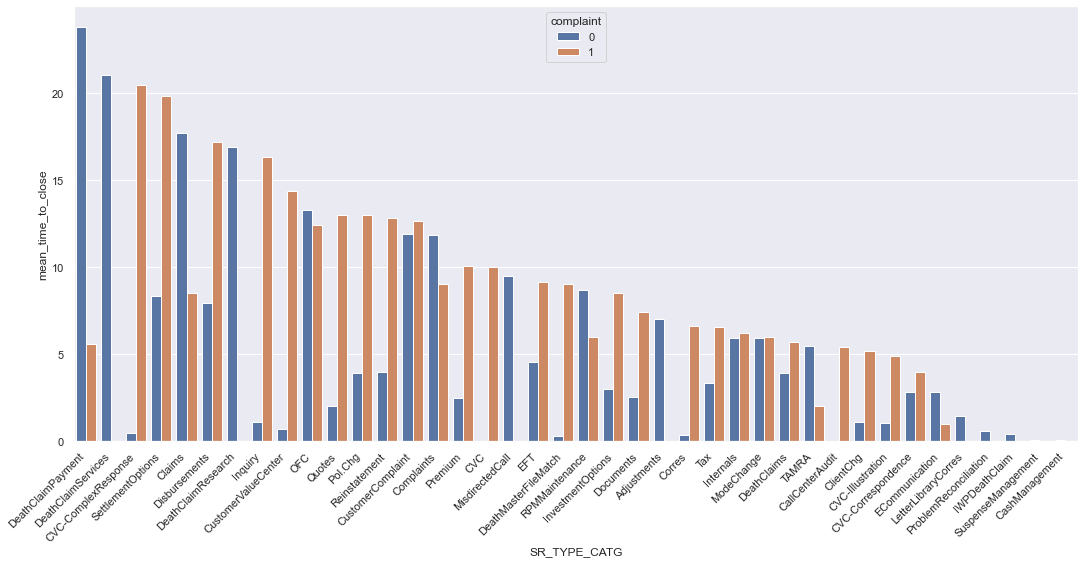

In [143]:
# Time to close
test = df.groupby(['SR_TYPE_CATG', 'complaint']).agg(mean_time_to_close=("time_to_close", 'mean'))
test=test.drop("ShareholderServices",axis=0)
test=test.reset_index().sort_values('mean_time_to_close', ascending=False)
display(test)

# plot barplot
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x="SR_TYPE_CATG",
           y="mean_time_to_close",
           hue="complaint",
           data=test)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

,SR_TYPE_CATG,ILI_Complaints,ILI Processing Time,Other SR,SR Processing Time
0,CustomerComplaint,2068,9.862119,5349,13.275193
1,Corres,328,7.902439,884160,0.335528
2,CallCenterAudit,119,7.647059,76116,0.015726
3,SettlementOptions,92,25.521739,398581,8.314001
4,Disbursements,58,20.672414,308639,7.907483
5,Premium,39,11.487179,790572,2.459173
6,ClientChg,33,7.787879,332865,1.086320
7,Reinstatement,32,17.500000,133926,3.963226
8,Documents,30,17.033333,32046,2.523385
9,EFT,28,10.714286,145636,4.578080


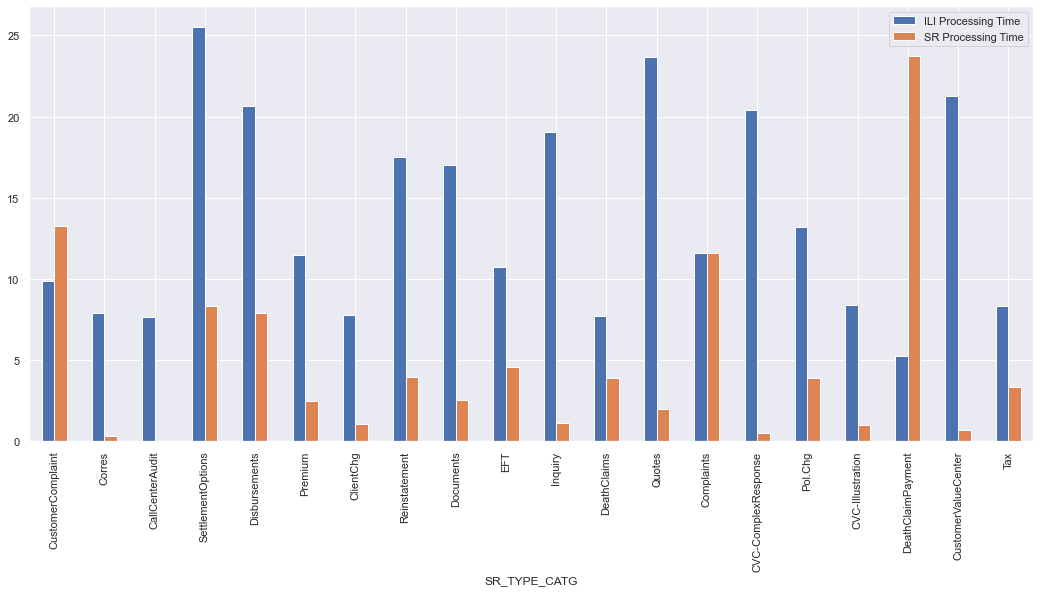

In [144]:
#SR_TYPE_CATG
t1 = pd.pivot_table(complaint_df, values=['POLICY_NBR','time_to_close'], index=['SR_TYPE_CATG'], aggfunc={'POLICY_NBR':'count', 
                                                                                             'time_to_close':np.mean})
t1 = t1.reset_index()
t1 =t1.sort_values(['POLICY_NBR'], ascending=False)


t2 = pd.pivot_table(non_complaint_df, values=['POLICY_NBR','time_to_close'], index=['SR_TYPE_CATG'], aggfunc={'POLICY_NBR':'count', 
                                                                                             'time_to_close':np.mean})
t2 = t2.reset_index()
t2 =t2.sort_values(['POLICY_NBR'], ascending=False)

t3 = t1.merge(t2, on='SR_TYPE_CATG', how ='left')
t3.columns = ['SR_TYPE_CATG', 'ILI_Complaints', 'ILI Processing Time', 'Other SR', 'SR Processing Time']
t3 = t3.head(20)
display(t3)


fig, ax = plt.subplots(1,1, figsize=(18, 8))
t3.plot(x="SR_TYPE_CATG", y=["ILI Processing Time", "SR Processing Time"], kind="bar", ax=ax)
plt.show()

,SR_TYPE_DESC,ILI_Complaints,ILI Processing Time,Other SR,SR Processing Time
0,WrittenComplaint,1583,5.910297,2106,1.005231
1,ComplaintProcessing,432,24.647332,3193,23.221045
2,ProvideInfo.,162,7.172840,317158,0.114213
3,PolicyInfo,133,7.601504,473385,0.134975
4,SuppressFieldOffNotif,119,7.647059,75793,0.013207
5,VerbalComplaint,53,7.660377,50,3.416667
6,BeneChg,27,20.851852,190925,11.585083
7,OneTimePremPymt,20,10.600000,628394,2.503004
8,CashSurr,17,26.235294,74760,23.463895
9,Statements&Histories,15,17.800000,11191,0.544047


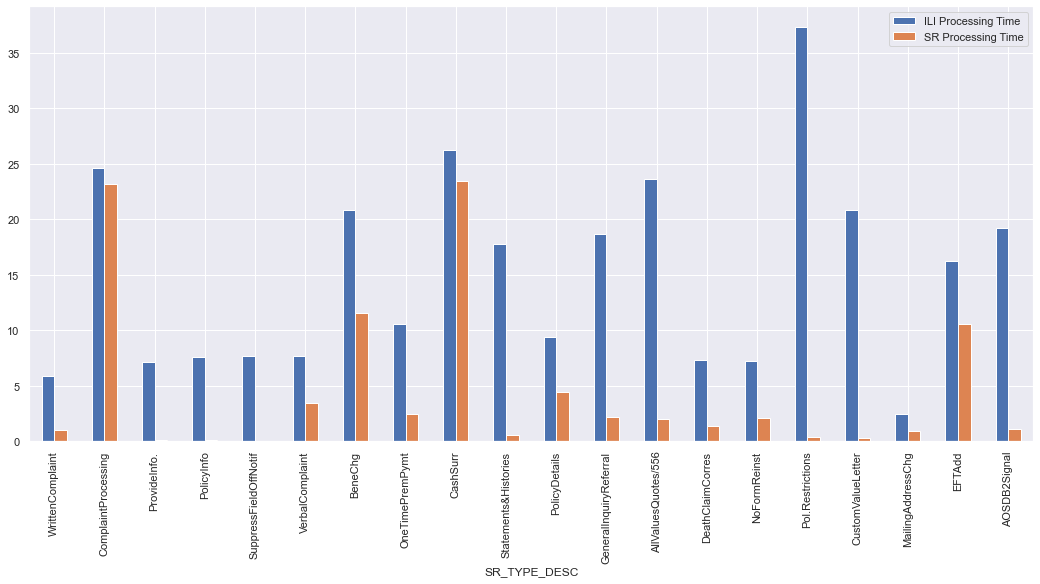

In [145]:
#SR_TYPE_DESC
t1 = pd.pivot_table(complaint_df, values=['POLICY_NBR','time_to_close'], index=['SR_TYPE_DESC'], aggfunc={'POLICY_NBR':'count', 
                                                                                             'time_to_close':np.mean})
t1 = t1.reset_index()
t1 =t1.sort_values(['POLICY_NBR'], ascending=False)


t2 = pd.pivot_table(non_complaint_df, values=['POLICY_NBR','time_to_close'], index=['SR_TYPE_DESC'], aggfunc={'POLICY_NBR':'count', 
                                                                                             'time_to_close':np.mean})
t2 = t2.reset_index()
t2 =t2.sort_values(['POLICY_NBR'], ascending=False)

t3 = t1.merge(t2, on='SR_TYPE_DESC', how ='left')
t3.columns = ['SR_TYPE_DESC', 'ILI_Complaints', 'ILI Processing Time', 'Other SR', 'SR Processing Time']
t3 = t3.head(20)
display(t3)


fig, ax = plt.subplots(1,1, figsize=(18, 8))
t3.plot(x="SR_TYPE_DESC", y=["ILI Processing Time", "SR Processing Time"], kind="bar", ax=ax)
plt.show()

In [52]:
df[(df['SR_TYPE_DESC']=='ComplaintProcessing') & (df['complaint']==0)]

,POLICY_NBR,CASE_CNTL_KEY,CASE_CREATE_DATE,SR_CREATE_DT,SR_CLOSE_DT,SR_TYPE_CATG,SR_TYPE_DESC,PRODUCT,complaint,min_create_dt,max_close_dt,closed,still_open,note_month,time_to_close
